In [7]:
import pandas as pd

Read data

In [8]:
df = pd.read_csv("fixation_data.tsv", sep='\t')
df.head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Participant name,Recording name,Recording duration,Timeline name,Recording Fixation filter name,Recording software version,...,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Viewport position X,Viewport position Y,Viewport width,Viewport height,Mouse position X,Mouse position Y
0,0,7386674582,NaN,Gaze_model1,Eskil,Recording1,109396,Timeline1,Tobii I-VT (Fixation),1.145.28180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89664,7386764246,Mouse,Gaze_model1,Eskil,Recording1,109396,Timeline1,Tobii I-VT (Fixation),1.145.28180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-800.0,600.0
2,105636,7386780218,Mouse,Gaze_model1,Eskil,Recording1,109396,Timeline1,Tobii I-VT (Fixation),1.145.28180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-800.0,601.0
3,121622,7386796204,Mouse,Gaze_model1,Eskil,Recording1,109396,Timeline1,Tobii I-VT (Fixation),1.145.28180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-800.0,602.0
4,137575,7386812157,Mouse,Gaze_model1,Eskil,Recording1,109396,Timeline1,Tobii I-VT (Fixation),1.145.28180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-800.0,605.0


The dataframe consists of 79 columns! As such we have to perform a bit of cleaning:

In [13]:
cols_to_keep = ['Recording timestamp', 'Participant name', 'Recording name', 'Eye movement type', 'Eye movement type index','Gaze event duration', 'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)', 'Presented Media name']
df = df[cols_to_keep]

A big part of the data consists of the calibration part of the experiments.
This has to be discarded, which we do by only keeping the rows where the participant looks at the picture in the experiment.

In [14]:
df = df[df["Presented Media name"] == 'test1.png']
df = df[df["Eye movement type"] == "Fixation"]

Since our aim is to look at each fixation, we need to keep just one row for each invidual fixation.
They are organized by `'Eye movement type index'`. Because different recordings can contain the same eye movement indices, we only discard the ones that are consecutively identical.

In [15]:
unique_fixations = df[df['Eye movement type index'] != df['Eye movement type index'].shift(1)]

Two histograms of fixation duration (same principle just different libraries)

array([[<AxesSubplot:title={'center':'Gaze event duration'}>]],
      dtype=object)

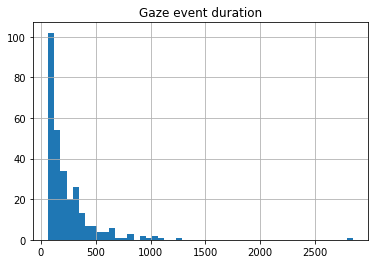

In [18]:
unique_fixations.hist(column='Gaze event duration', bins=50)

In [19]:
import plotly.express as px
px.histogram(unique_fixations, x='Gaze event duration', nbins=50)